Number of nodes in the last tree is: 1 with ccp_alpha: 0.6708343512491904 and a depth of: 0


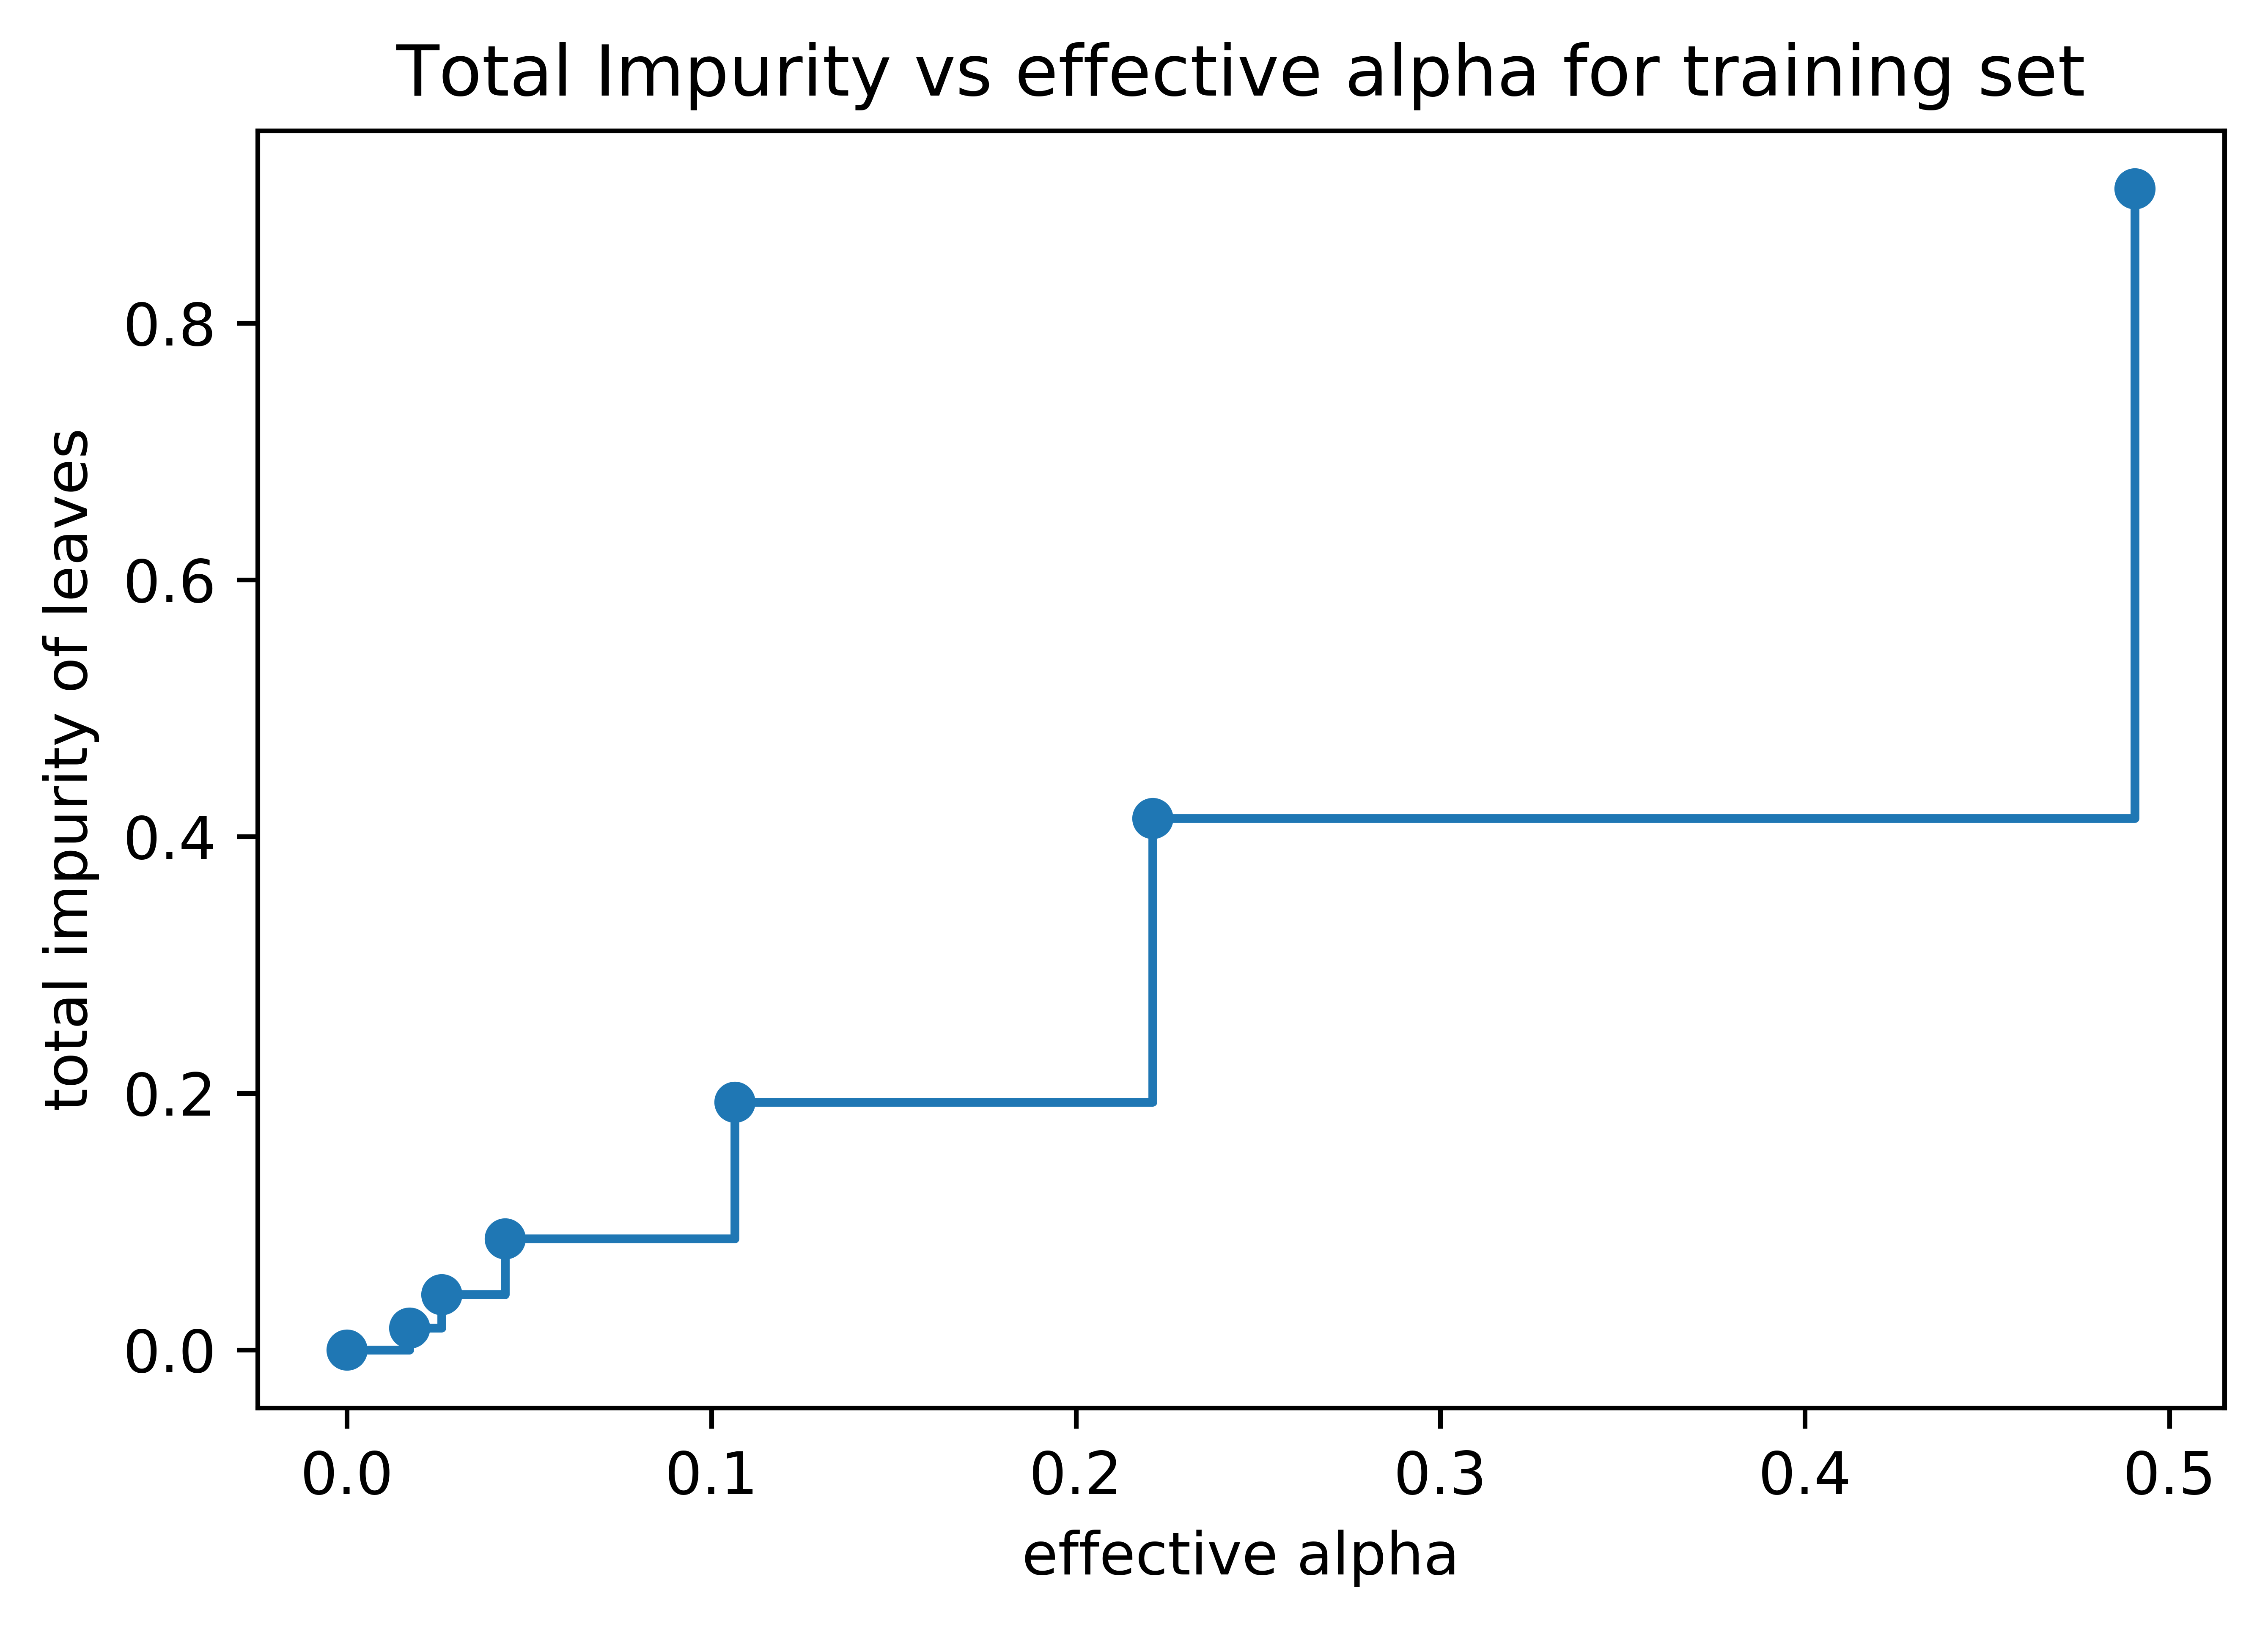

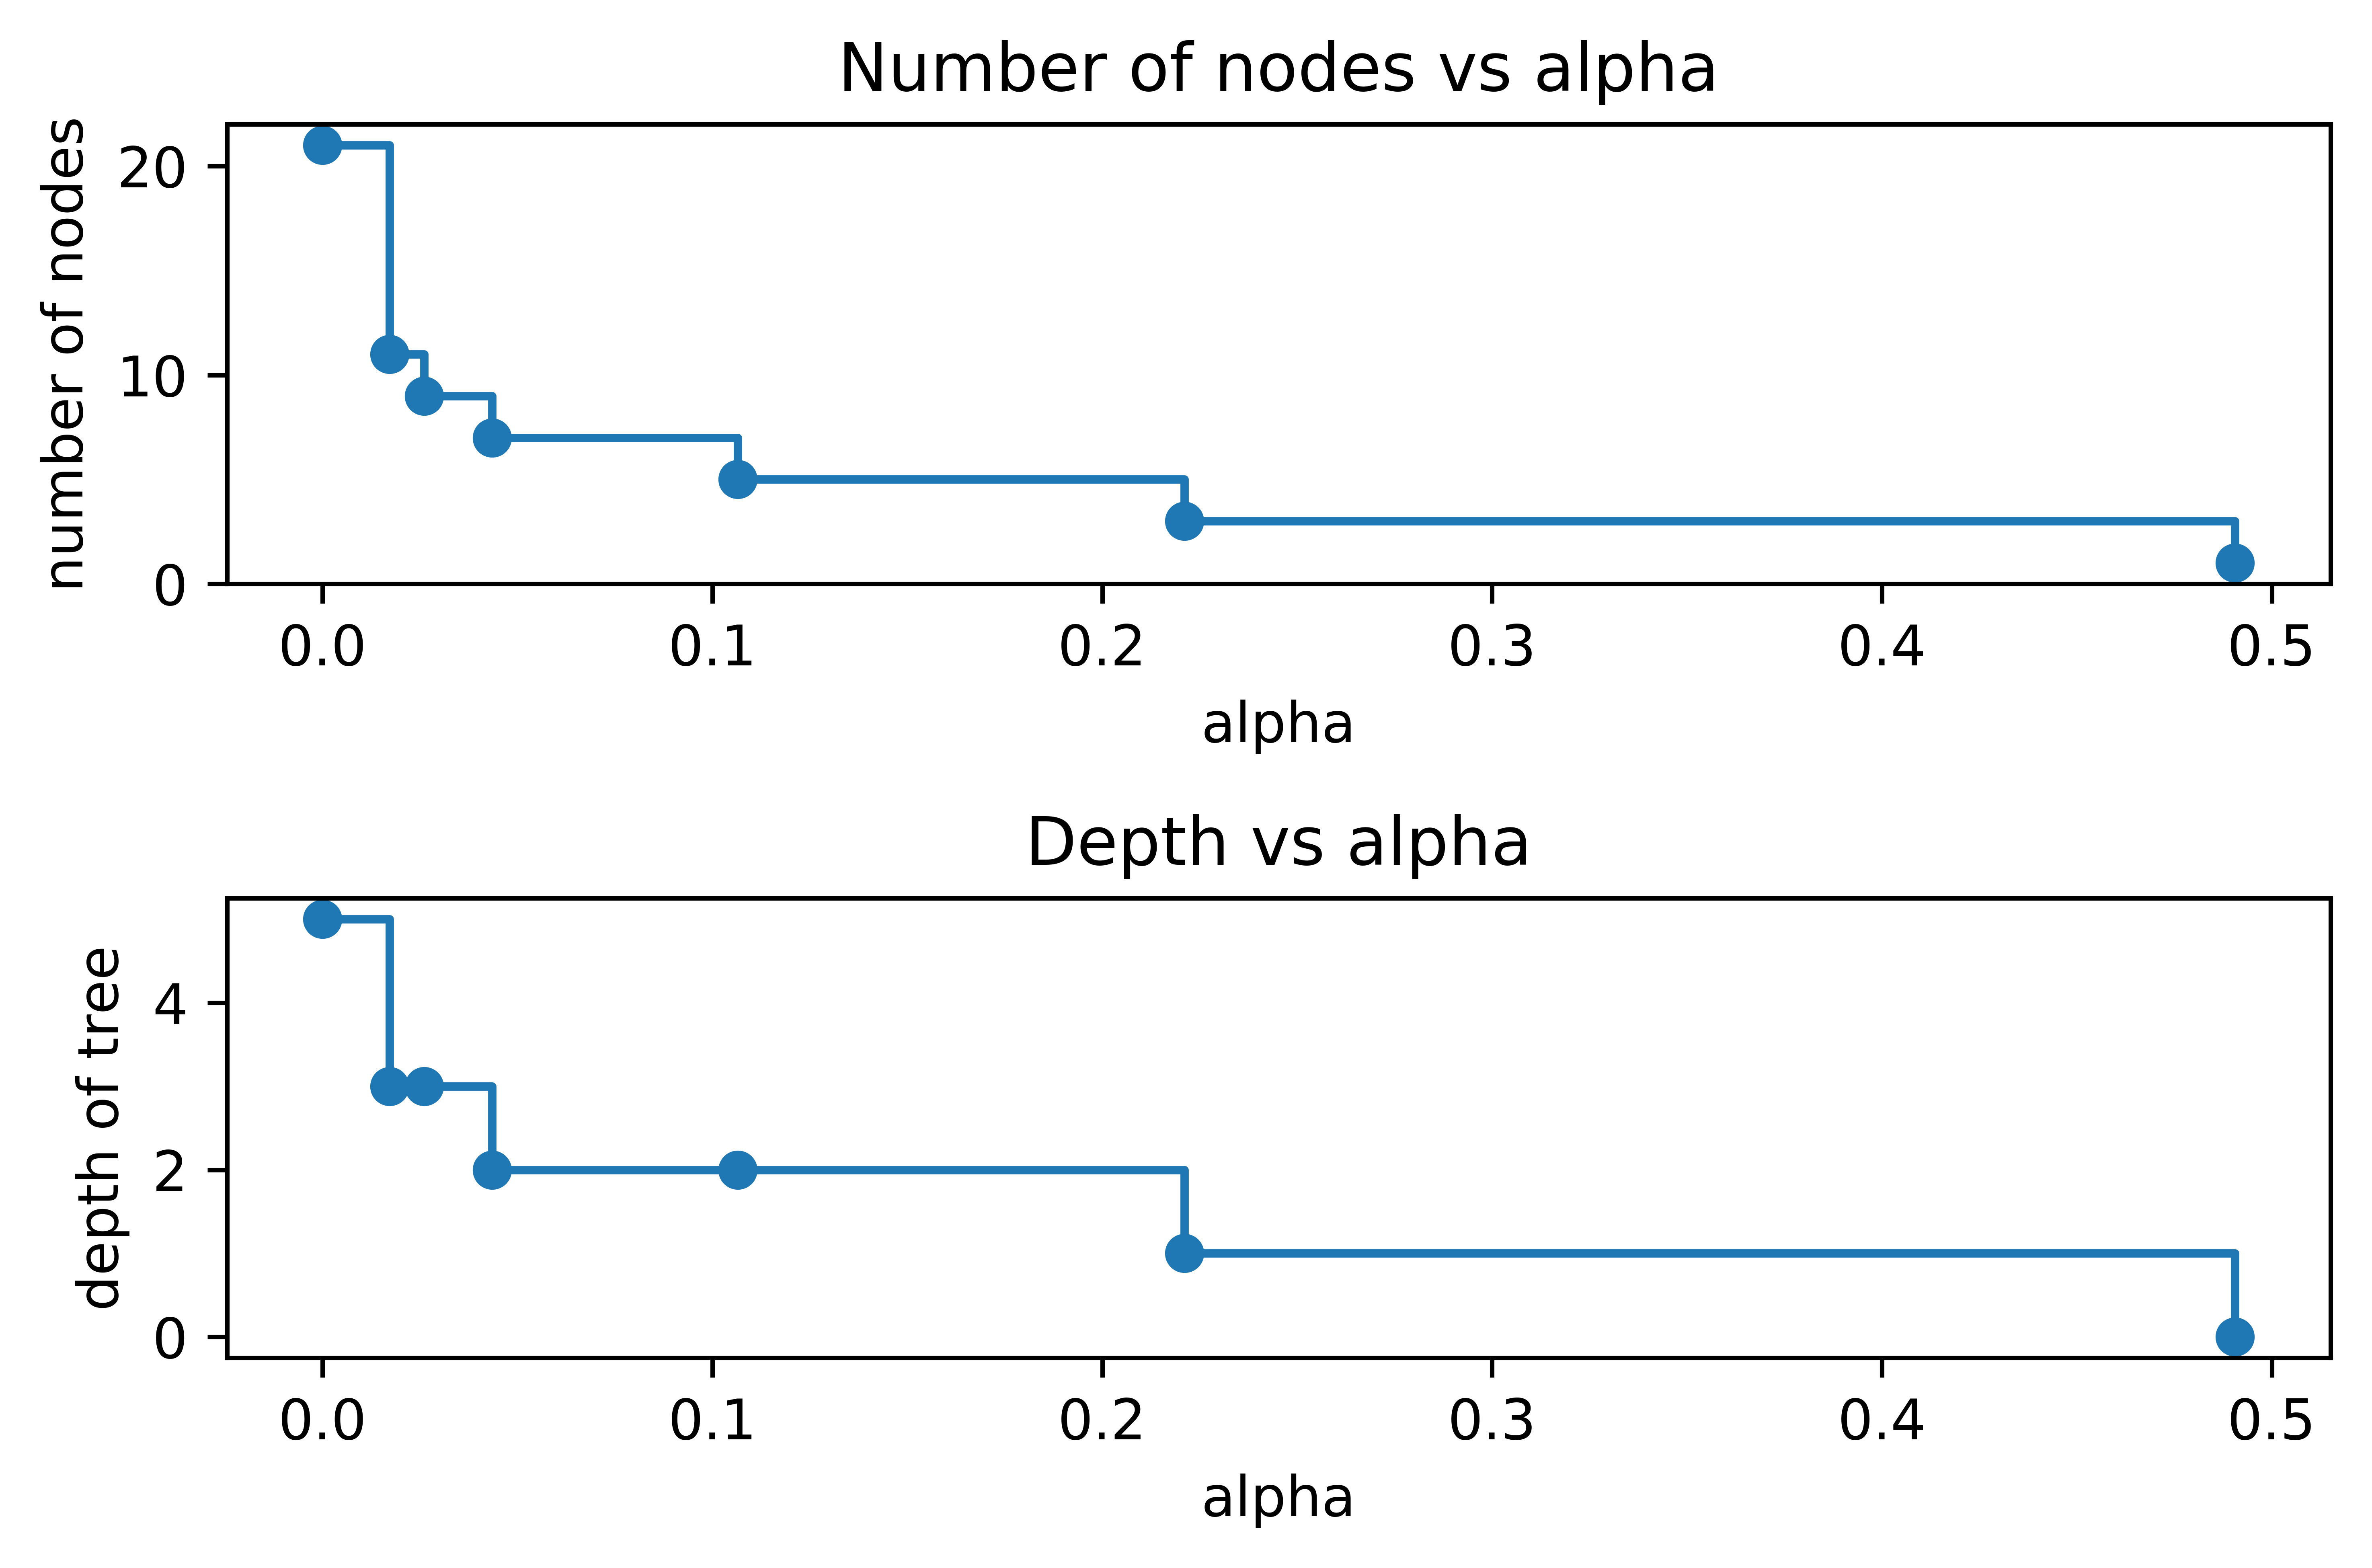

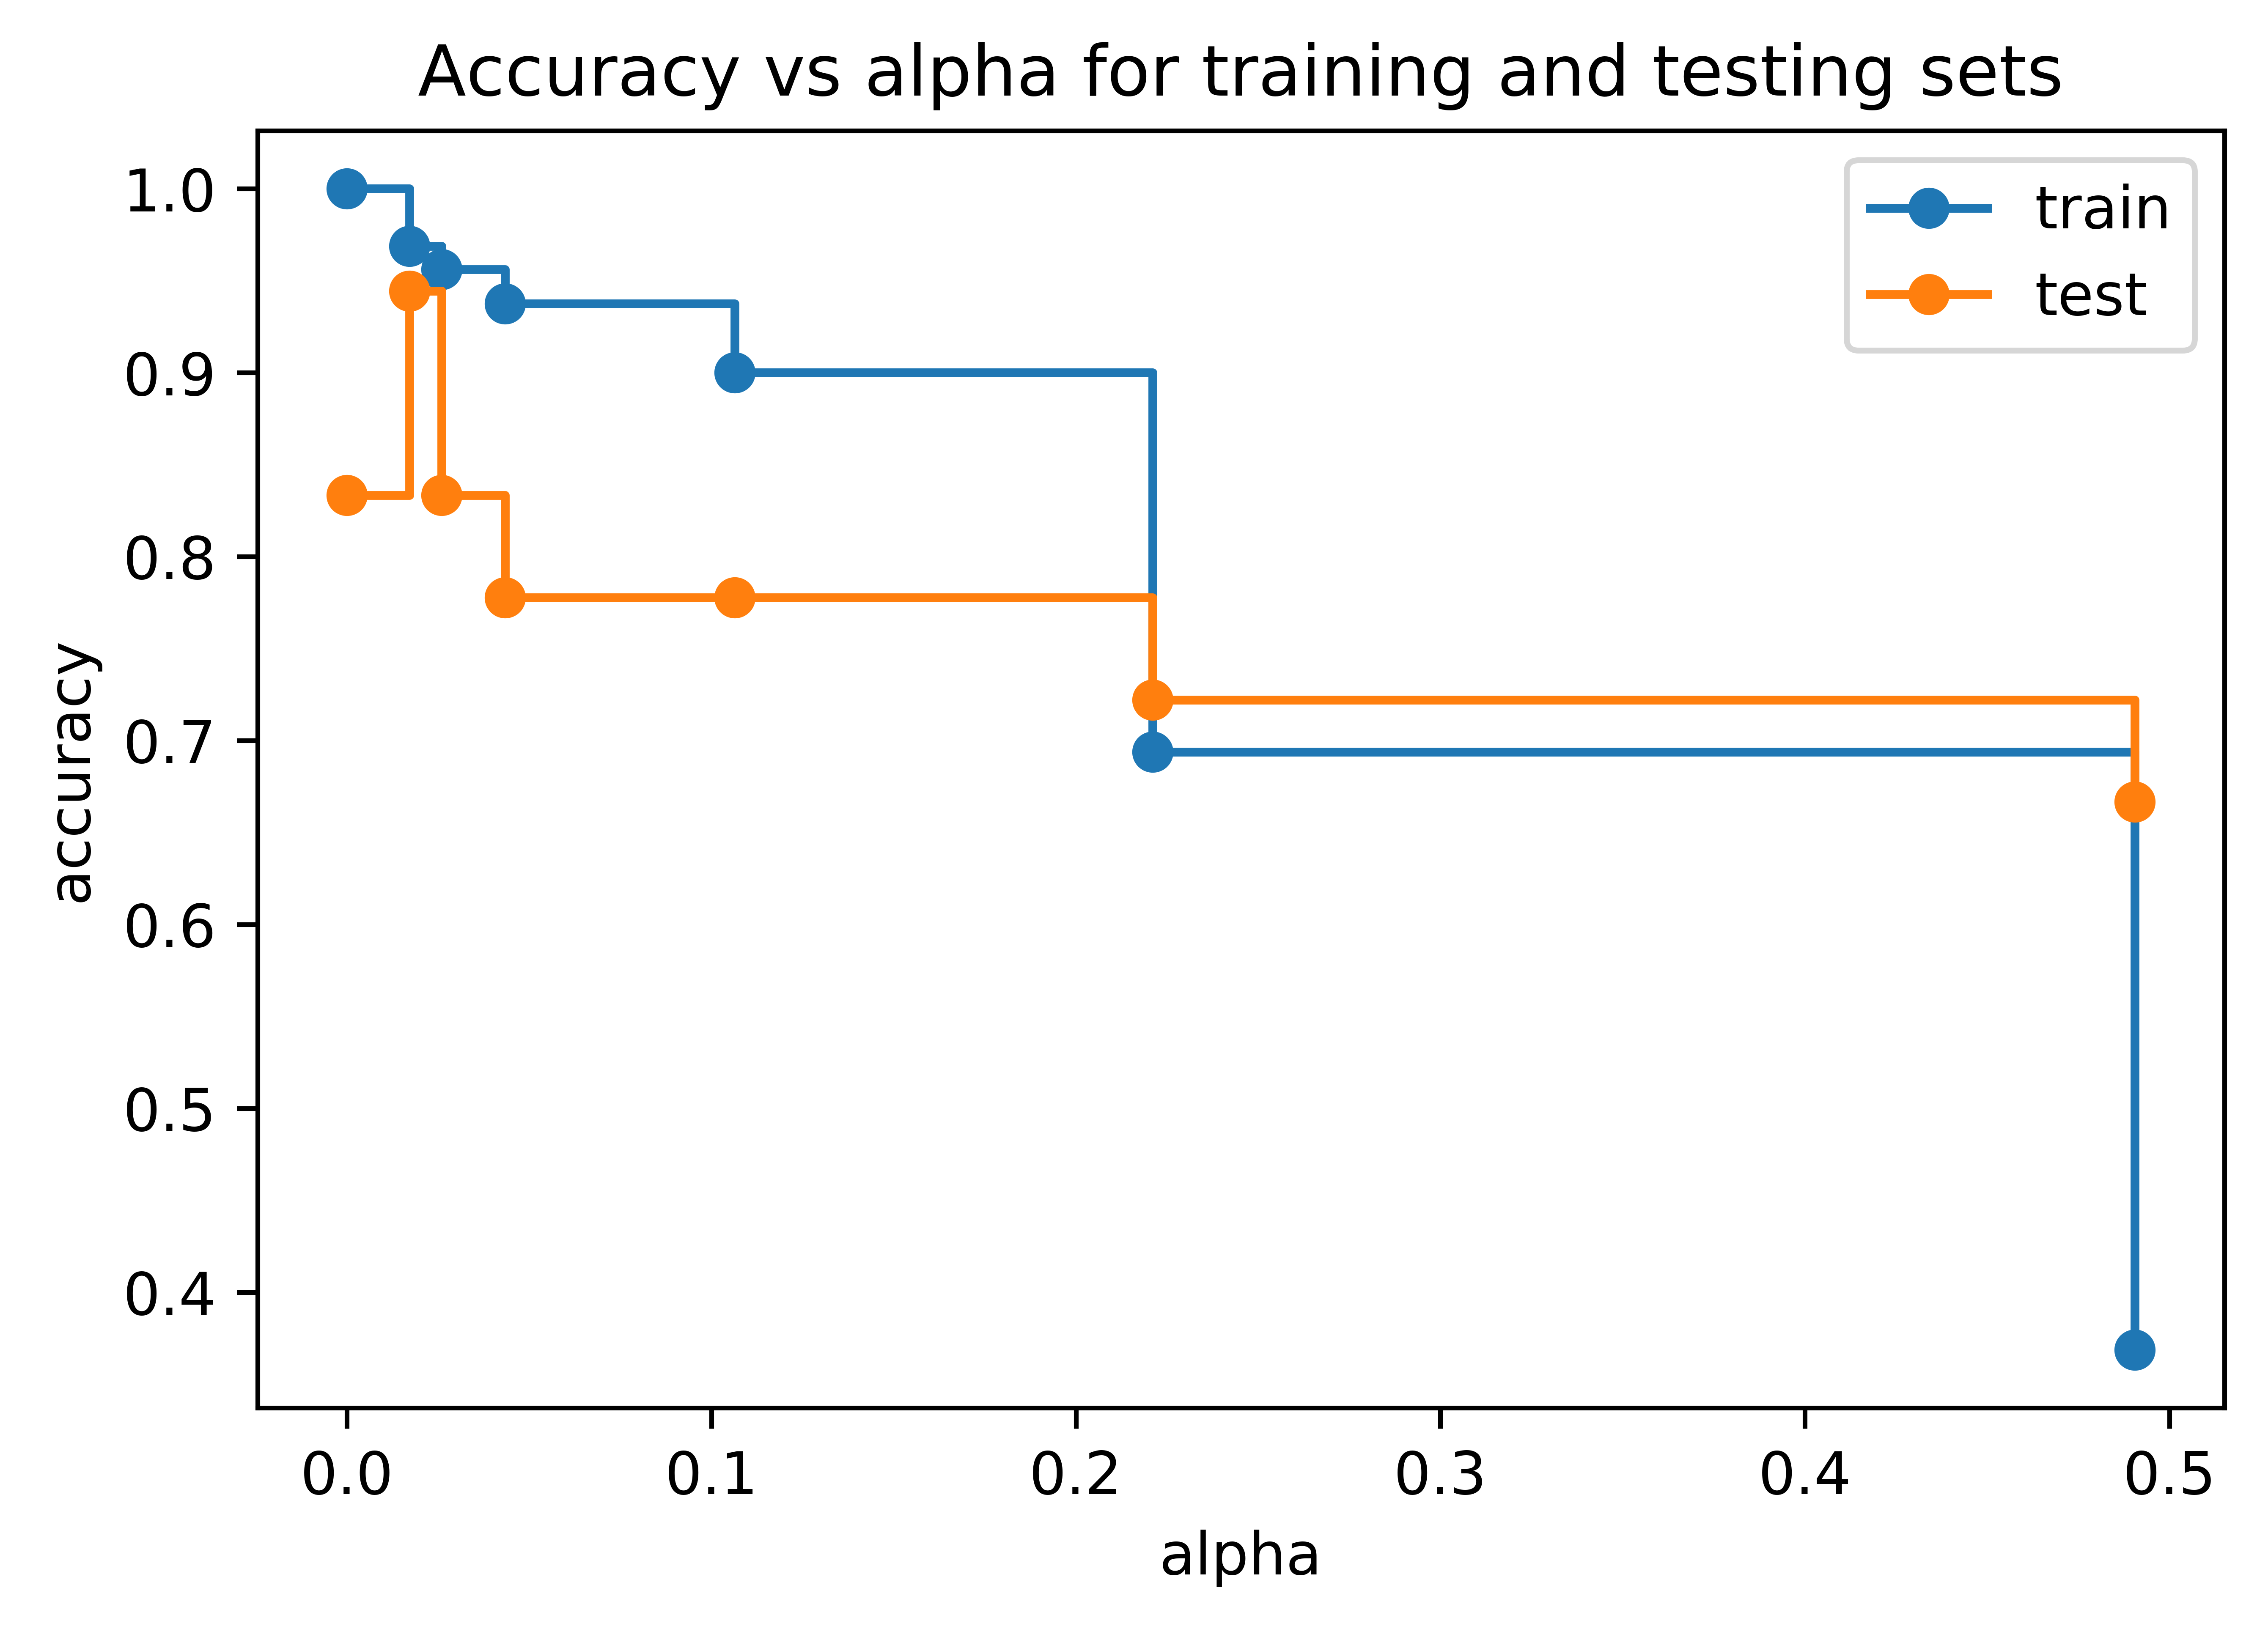

Training accuracy of best model:  0.96875
Test accuracy of best model:  0.9444444444444444


In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, tree, model_selection, metrics

from sklearn.datasets import load_wine
data = load_wine()
X = data.data
Y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df[data.feature_names], df['target'], test_size = 0.1)


path=tree.DecisionTreeClassifier(criterion='entropy').\
cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, Y_train))
print('Test accuracy of best model: ',best_model.score(X_test, Y_test))
    

In [20]:
def tree_prune_train(criterion='entropy'):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df[data.feature_names], df['target'], test_size = 0.1)
    
    path=tree.DecisionTreeClassifier(criterion=criterion).\
    cost_complexity_pruning_path(X_train, Y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        clf.fit(X_train, Y_train)
        clfs.append(clf)

    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]


    train_scores = [clf.score(X_train, Y_train) for clf in clfs]
    test_scores = [clf.score(X_test, Y_test) for clf in clfs]
    

    index_best_model = np.argmax(test_scores)
    best_model = clfs[index_best_model]
    
    return best_model.score(X_test, Y_test)


for tree_type, criterion in [('CART', 'gini'), ('C4.5', 'entropy')]:
    accuracy_list = []

    for i in range(0, 1000):
        ac = tree_prune_train(criterion=criterion)
        accuracy_list.append(ac)
    
    print('average accuracy of decision tree ' + '(' + str(tree_type) + ', Cost Complexity Pruning): ' + str("%.4f" % np.mean(accuracy_list)))



average accuracy of decision tree (CART, Cost Complexity Pruning): 0.9237
average accuracy of decision tree (C4.5, Cost Complexity Pruning): 0.9198
